In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
cdf = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


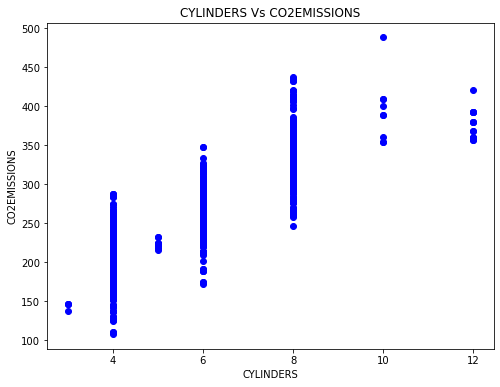

In [29]:
plt.figure(figsize = (8,6))
plt.scatter(cdf['CYLINDERS'],cdf['CO2EMISSIONS'],color = 'blue')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.title('CYLINDERS Vs CO2EMISSIONS')
plt.show()

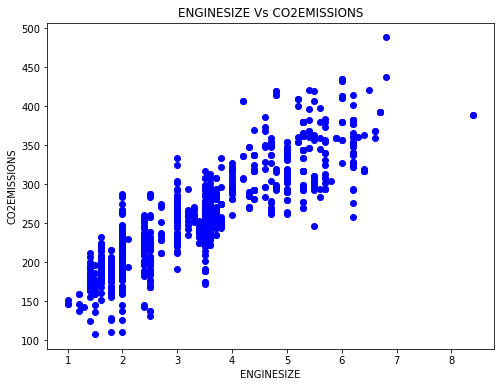

In [30]:
plt.figure(figsize = (8,6))
plt.scatter(cdf['ENGINESIZE'],cdf['CO2EMISSIONS'],color = 'blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.title('ENGINESIZE Vs CO2EMISSIONS')
plt.show()

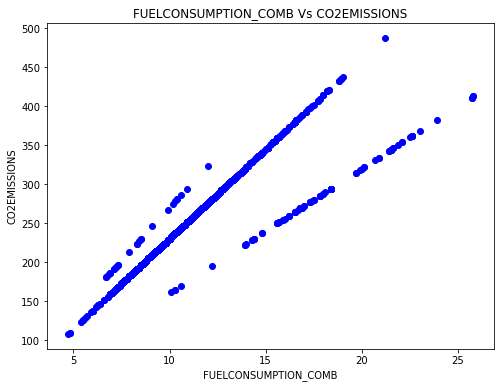

In [31]:
plt.figure(figsize = (8,6))
plt.scatter(cdf['FUELCONSUMPTION_COMB'],cdf['CO2EMISSIONS'],color = 'blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.title('FUELCONSUMPTION_COMB Vs CO2EMISSIONS')
plt.show()

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(cdf[['ENGINESIZE']],cdf['CO2EMISSIONS'],test_size = 0.1, random_state = 1)
poly = PolynomialFeatures(degree = 2)
x_train_ploy = poly.fit_transform(x_train)
x_train_ploy

array([[ 1.  ,  5.3 , 28.09],
       [ 1.  ,  1.8 ,  3.24],
       [ 1.  ,  2.  ,  4.  ],
       ...,
       [ 1.  ,  4.8 , 23.04],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  3.2 , 10.24]])

In [38]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_ploy,y_train)


LinearRegression()

In [39]:
print ('Coefficients: ', lin_reg.coef_)
print ('Intercept: ',lin_reg.intercept_)

Coefficients:  [ 0.         50.25174808 -1.45952423]
Intercept:  107.52758235440385


In [46]:
lin_reg.coef_[2]

-1.4595242342283372

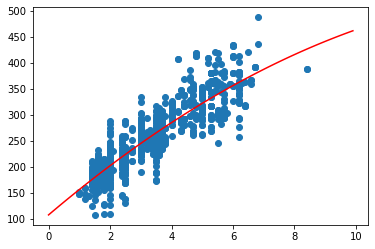

In [48]:
plt.scatter(x = 'ENGINESIZE', y = 'CO2EMISSIONS', data = cdf)
XX = np.arange(0.0, 10.0, 0.1)
yy = lin_reg.intercept_+ lin_reg.coef_[1]*XX+ lin_reg.coef_[2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )


In [51]:
from sklearn.metrics import r2_score

y_pred_2 = lin_reg.predict(x_train_ploy)

In [54]:
y_pred_2[0:5]

array([332.86381142, 193.25187037, 202.19298157, 219.72491815,
       362.98430887])

In [60]:
y_pred_2.shape

(960,)

In [61]:
y_test.shape

(107,)

In [56]:
y_train[0:5]

264     294
1015    200
99      209
593     235
374     402
Name: CO2EMISSIONS, dtype: int64

In [62]:
r2_score(y_pred_2, y_train)

0.6998613370168922

In [63]:
x_test_poly = poly.fit_transform(x_test)
y_pred_4 = lin_reg.predict(x_test_poly)

In [67]:
y_pred_4.shape

(107,)

In [69]:
y_test.shape

(107,)

In [70]:
r2_score(y_pred_4,y_test)

0.68639308821304